In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Importing the dataset
dt = pd.read_excel('Gene Clinical.xlsx',index_col=0)


In [3]:
dt.shape

(517, 15154)

In [4]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,0,0,0,1,0,1,0,1,0,50.03


In [5]:
del dt['Column1']
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']

In [6]:
X = dt.iloc[:,0:15149]
y = dt.iloc[:, -1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [10]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

In [11]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('UBE2Q2P2', 0.0)
('SSX9', 0.0)
('CXORF67', 2.5767835143003157e-06)
('EFCAB8', 0.00023234784305717842)
('SDR16C6P', 0.0)
('EFCAB12', 4.054458224088311e-05)
('A1BG', 6.560937356599007e-08)
('A1CF', 0.0)
('RBFOX1', 5.5531770094729055e-05)
('GGACT', 2.491091377883475e-07)
('A2ML1', 3.17954585360998e-06)
('A2M', 4.6626962198586896e-07)
('A4GALT', 6.519159412697702e-05)
('A4GNT', 1.9796301223304782e-06)
('AAAS', 2.2574577477595512e-07)
('AACSP1', 5.6442777771012895e-06)
('AACS', 0.00012493022216976225)
('AADACL2', 0.00010717661887043028)
('AADACL3', 0.0)
('AADACL4', 0.0)
('AADAC', 6.585353055553882e-07)
('AAGAB', 0.0)
('AAK1', 1.0899693931453286e-08)
('AAMP', 0.0)
('AANAT', 4.896541639719858e-06)
('AARS2', 5.1107375663465786e-08)
('AARSD1', 3.7330223262421725e-09)
('AARS', 2.7050663694368696e-07)
('AASDHPPT', 5.37691632349642e-06)
('AASDH', 4.772882827203067e-06)
('AASS', 3.9689233725246205e-09)
('AATF', 0.0)
('AATK', 0.0)
('ABAT', 6.482351914589514e-08)
('ABCA10', 1.8057990147421722e-05)
(

('CCL16', 1.9682764664944113e-06)
('CCL17', 4.8388962775298896e-05)
('CCL18', 1.1354720802863479e-05)
('CCL19', 8.067167179700967e-11)
('CCL1', 0.0)
('CCL20', 0.0003679675116071976)
('CCL21', 7.849960744129265e-09)
('CCL22', 1.7075399973896588e-06)
('CCL23', 1.6769415524134193e-05)
('CCL24', 5.632927939877303e-05)
('CCL25', 1.665088362469871e-06)
('CCL26', 0.0)
('CCL27', 3.529540069441357e-07)
('CCL28', 3.661391237454017e-06)
('CCL2', 1.9137659787319338e-08)
('CCL3L1', 4.182622492587227e-06)
('CCL3L3', 2.235175952191519e-06)
('CCL3', 7.370274369735536e-10)
('CCL4L1', 4.166919580772912e-06)
('CCL4', 1.194540683193038e-07)
('CCL5', 7.368267925296914e-08)
('CCL7', 0.0)
('CCL8', 5.669002726297532e-05)
('CCNA1', 9.093472885776994e-06)
('CCNA2', 3.415740668206257e-08)
('CCNB1IP1', 1.1099320343770814e-07)
('CCNB1', 6.629084892339396e-08)
('CCNB2', 6.065416300393045e-07)
('CCNB3', 0.0)
('CCNC', 0.00026258579247398164)
('CCND2', 0.0)
('CCND3', 0.0)
('CCNE1', 0.00014844254135778156)
('CCNE2', 3.

('DDX5', 0.0)
('DDX60L', 1.3635090563029335e-06)
('DDX60', 2.3833593548501404e-06)
('DDX6', 1.1291697813342361e-08)
('DEAF1', 7.158451641389167e-07)
(datetime.datetime(2001, 12, 1, 0, 0), 0.0)
('DECR1', 0.0)
('DECR2', 0.0)
('DEDD2', 1.1165662672191893e-07)
('DEDD', 1.1003198162732049e-07)
('DEF6', 0.0)
('DEF8', 0.0)
('DEFA1B', 0.0)
('DEFA4', 0.0)
('DEFA5', 0.0)
('DEFA6', 2.8843351707617785e-07)
('DEFB103A', 0.0)
('DEFB119', 0.0)
('DEFB122', 0.0)
('DEFB123', 0.0)
('DEFB124', 0.0)
('DEFB125', 0.0)
('DEFB126', 1.9117366704687168e-05)
('DEFB127', 0.0)
('DEFB129', 0.0)
('DEFB131', 0.0)
('DEFB132', 0.0)
('DEFB136', 0.0)
('DEFB1', 5.407942639449201e-07)
('DEFB4A', 2.3624784971678524e-06)
('DEGS1', 2.3459306553540355e-05)
('DEGS2', 2.3577347894063855e-07)
('DEK', 1.1534030724618062e-05)
('EXO5', 1.310878715477319e-07)
('DENND1A', 4.199695319062264e-06)
('DENND1B', 9.49164392867418e-05)
('DENND1C', 1.8414433136544518e-05)
('DENND2A', 1.218156250470631e-05)
('DENND2C', 0.0003390647818003277)
('D

('HTRA4', 4.788876274627013e-06)
('HTT', 1.4615300776473196e-05)
('HULC', 7.258975275898163e-09)
('HUNK', 0.00010394374183705315)
('HUS1B', 0.00010714680028503395)
('HUS1', 4.1776585412484684e-05)
('HUWE1', 1.6440498194839045e-08)
('HVCN1', 0.0)
('HYAL1', 3.2789762885072735e-05)
('HYAL2', 0.00012289820059963876)
('HYAL3', 3.861804838756946e-05)
('HYAL4', 0.0)
('HYDIN', 1.8126417791939543e-07)
('HYI', 2.3829164090413155e-06)
('HYLS1', 0.0)
('HYOU1', 5.992895563855535e-06)
('IAH1', 8.354447306965784e-07)
('IAPP', 0.0)
('IARS2', 1.2691350259802098e-05)
('IARS', 1.740164022286266e-05)
('IBSP', 2.7113035740432152e-05)
('IBTK', 0.0)
('ICA1L', 0.0)
('ICA1', 4.8959580694184585e-06)
('ICAM1', 1.9315228125008576e-07)
('ICAM2', 2.37657648797837e-08)
('ICAM3', 0.00021600203997219154)
('ICAM4', 6.045602494541779e-07)
('ICAM5', 0.0006836166618638588)
('ICK', 0.0)
('ICMT', 2.1959549391472305e-10)
('ICOSLG', 3.7243571940582816e-06)
('ICOS', 0.0007179581632992969)
('ICT1', 3.4106851225281024e-07)
('ID1

('NGRN', 9.828187896613297e-08)
('SLC9B1', 3.826071676857917e-05)
('SLC9B2', 9.420155364105469e-07)
('NHEJ1', 3.7926105347332776e-07)
('NHLH1', 0.00010051548126744997)
('NHLH2', 2.9503065289208254e-09)
('NHLRC1', 4.2808046505405624e-08)
('NHLRC2', 7.3059929563772205e-09)
('NHLRC3', 0.0)
('NHLRC4', 0.0)
('NHP2L1', 0.0017962918209399284)
('NHP2', 8.844682037831748e-11)
('NHSL1', 3.029128856939323e-06)
('NHSL2', 2.732141418766094e-07)
('NHS', 0.0)
('NICN1', 3.9315921871723825e-07)
('NID1', 4.938433477942088e-08)
('NID2', 4.067200545303155e-08)
('NIF3L1', 3.374428365767741e-08)
('NINJ1', 0.00012753357983663738)
('NINJ2', 2.861095779298238e-05)
('NINL', 1.1579553013728112e-07)
('NIN', 0.0)
('NIP7', 0.0)
('NIPA2', 2.427128042773882e-05)
('NIPAL1', 0.0)
('NIPAL2', 5.27228762806309e-08)
('NIPAL3', 2.9902385821061423e-06)
('NIPAL4', 1.5937553503538636e-06)
('NIPBL', 0.0)
('NIPSNAP1', 0.000520794184018882)
('NIPSNAP3A', 2.7756154707762308e-08)
('NIPSNAP3B', 7.332395203685935e-08)
('NISCH', 1.039

('RRP15', 1.8693199701713525e-07)
('RRP1B', 8.431309383501442e-07)
('RRP1', 2.1624333974300582e-05)
('RRP7A', 7.726924228024666e-11)
('RRP7BP', 5.96964020524574e-07)
('RRP8', 4.563689705949734e-09)
('RRP9', 8.373482183520436e-07)
('RRS1', 3.920239238243911e-08)
('RS1', 2.3091296267034554e-09)
('RSAD1', 3.011680953061962e-05)
('RSAD2', 7.799968641424591e-11)
('RSBN1L', 2.715678749144591e-08)
('RSBN1', 4.077326276013617e-06)
('RSC1A1', 4.032407903940536e-07)
('RSF1', 2.0785890408655044e-07)
('RSL1D1', 0.0)
('RSL24D1', 1.0570311829719234e-07)
('RSPH10B2', 2.557124016593524e-07)
('RSPH1', 2.3551147251244526e-11)
('RSPH3', 0.0)
('RSPH4A', 0.0)
('RSPH6A', 0.00013988252889797124)
('RSPH9', 0.0)
('RSPO1', 5.1651418012733395e-09)
('RSPO2', 1.627483675625364e-11)
('RSPO3', 1.9134022085383636e-07)
('RSPO4', 0.0)
('RSPRY1', 1.1307201507074614e-10)
('RSRC1', 8.118999897805453e-07)
('RSRC2', 2.347463248276662e-08)
('RSU1', 0.00019331296393152228)
('RTBDN', 0.0)
('RTCA', 0.0)
('RSPH14', 3.38411580374

In [13]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [14]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [15]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

EFCAB8
AACS
AADACL2
ABCA17P
ABCA4
ABCB10
ABCC6
ABCC8
ABCE1
ABCG2
ABHD10
ABHD15
ABL1
ABL2
ABRA
ASIC3
ACCSL
ACO2
ACOT13
ACOT1
ACOX1
ACP2
ACSM1
ACSM4
ACSM5
ACVR1C
ACVR2A
ADAL
ADAM21
ADAM6
ADAMDEC1
ADAMTS4
ADAT2
ADCK5
ADCY8
ADCYAP1R1
ADM
ADRBK2
ADSL
AFMID
AGL
AGPAT1
AGPS
AGR2
AGTRAP
AIFM3
AIM2
AKAP8
AKR1B10
AKR1B15
AKR7A2
AKTIP
ALAS1
ALG14
ALG2
ALG8
ALKBH4
ALOX12P2
ALPPL2
AMH
ANKRD11
ANKRD13A
ANKRD26P1
ANKRD40
ANKRD52
ANO4
ANO5
ANO7
ANPEP
ANXA11
ANXA1
AP1G1
AP2M1
AP3D1
AP3S2
APBA2
APEX2
APLN
APOA1
APOBEC3A
APRT
AQP8
AQP9
ARF1
ARF3
ARFIP2
ARG1
ARHGAP20
ARHGAP27
ARHGEF33
ARID2
ARID3A
ARID5A
ARL13B
ARL17A
ARL4A
ARL6IP1
ARMC7
ARSF
ARSI
ART3
ASAH1
ASGR1
ASNSD1
ASPSCR1
ASTN1
ATAD2
ATAD3C
ATF7IP2
ATG3
ATP13A1
ATP5O
ATP6AP1
ATP6V0A4
ATP6V1G2
AUH
AVEN
AVIL
B3GALTL
B3GNT4
B3GNT5
B4GALNT1
B4GALNT2
BACH2
BAG1
BAG4
BANP
PRRC2B
BCAP31
BCAS1
BCAS2
BCL2
BCOR
BCS1L
BDKRB2
BEND5
BEST2
BEST3
BHLHB9
BIRC2
BLMH
BLNK
BLVRA
BMP4
BMP8A
BPIFB2
BPNT1
BRDT
BRF2
BRI3
BSPRY
BST1
BTAF1
SLX4
BTG3
BTN3A1
BTRC
C10ORF11
FU

In [16]:
sfm.get_support().sum()

1554

In [17]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [18]:
rgr_important = GradientBoostingRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:

y_predval = rgr_important.predict(X_important_val)

In [20]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.5546178473982201
0.5694359075536535
0.7546097717056501
R2 Score
0.201275852580876


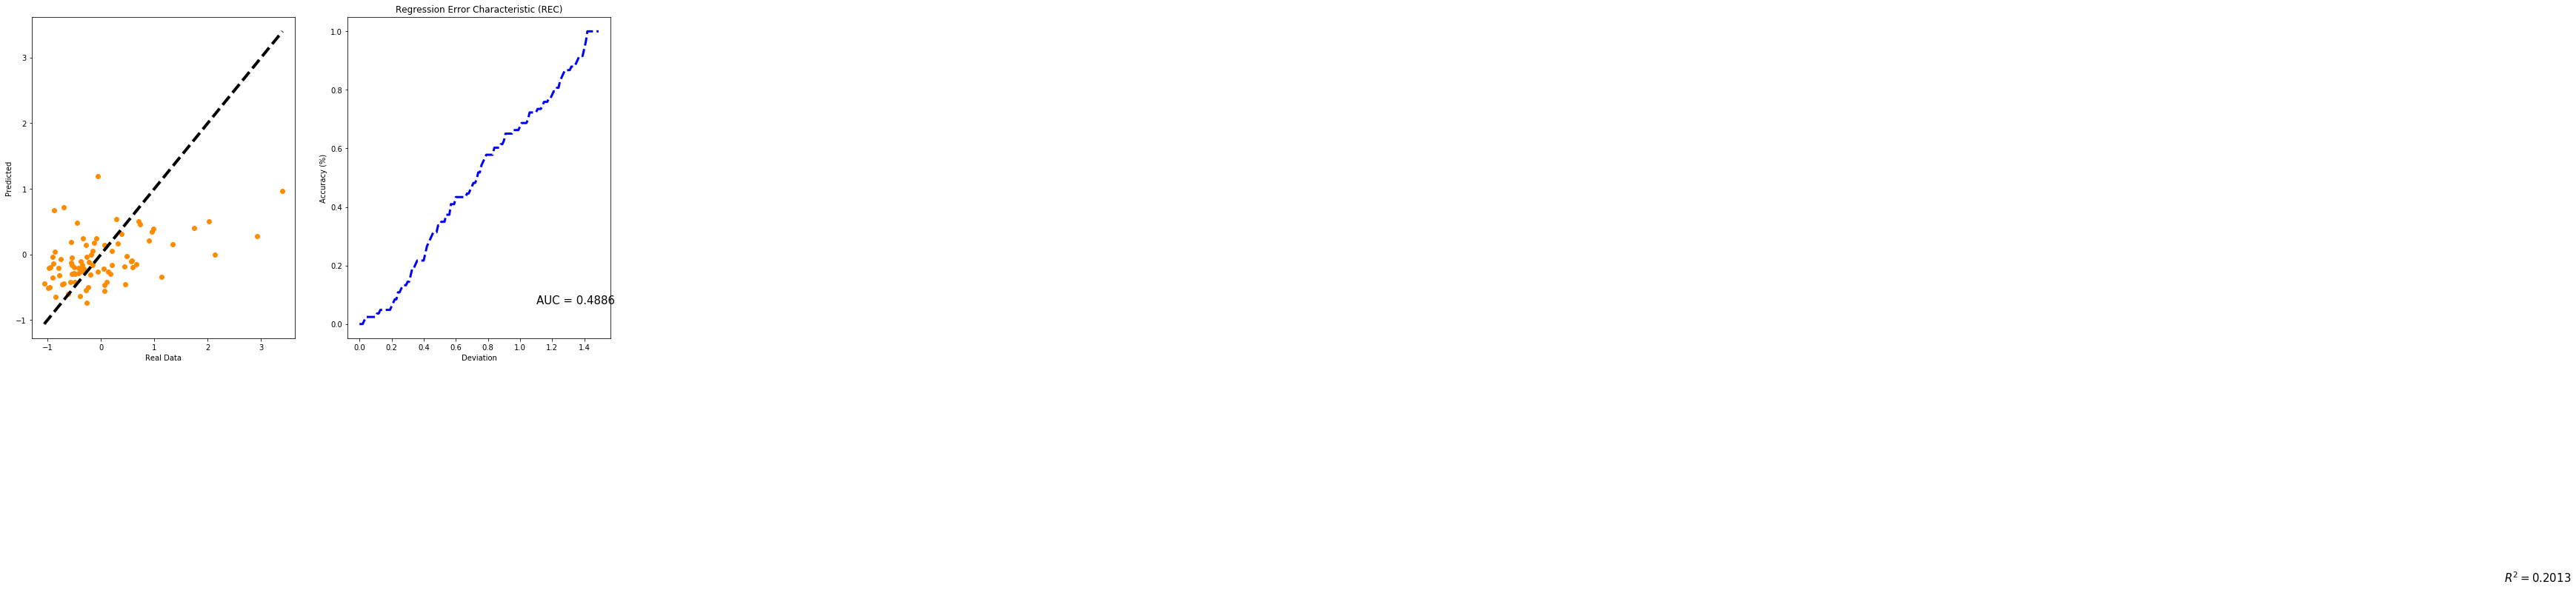

In [22]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [23]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {  'learning_rate':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
                 'n_estimators': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70] ,
              'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,95,100],
              'min_samples_split':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'min_samples_leaf':[0.1,0.20,0.3,0.4,0.5],
              'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
              'max_features': [1,2,3,4,5,6,7,8,9,10]
                 }  
regressor = GradientBoostingRegressor()
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,cv=3,n_jobs=-1)
random_result=random.fit(X_important_train,y_train)
print("Best: %f using %s" % (random_result.best_score_,random_result.best_params_))

Best: -0.021164 using {'n_estimators': 8, 'min_weight_fraction_leaf': 0.3, 'min_samples_split': 80, 'min_samples_leaf': 0.2, 'max_features': 6, 'max_depth': 65, 'learning_rate': 0.05}


/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


In [24]:
regressor = GradientBoostingRegressor(learning_rate=0.05,n_estimators=8,max_depth=65,min_samples_split = 80,min_samples_leaf=0.2,min_weight_fraction_leaf=0.3,max_features=6)

regressor.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=65, max_features=6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=0.2,
             min_samples_split=80, min_weight_fraction_leaf=0.3,
             n_estimators=8, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_predval = regressor.predict(X_important_val)

In [26]:

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6231601104816717
0.707365141851263
0.8410500233941278
R2 Score
0.007808232068815979


R^2 = 0.0078


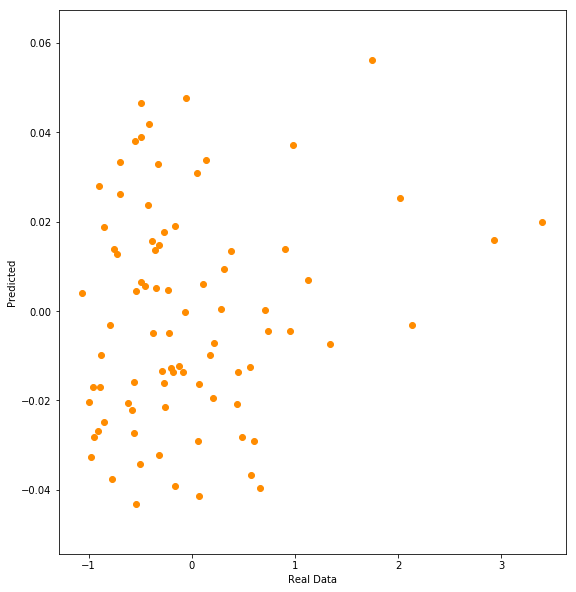

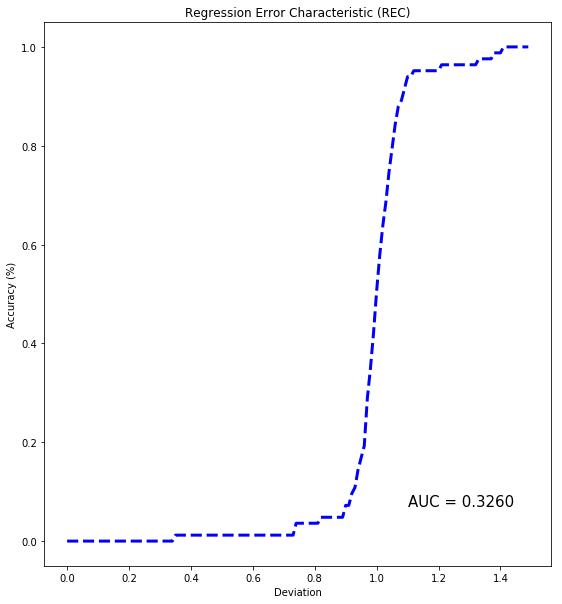

In [27]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()